# Customer Churn Analysis

### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# checking the shape of the dataset
df.shape

(7043, 21)

In [5]:
# there are 7043 rows and 21 columns

In [6]:
# checking the names of the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the datatypes of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# most of the columns are of object types datatypes and few of them are of integer and float type datatypes.

### cheking the null values

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:title={'center':'Heatmap Null Values'}>

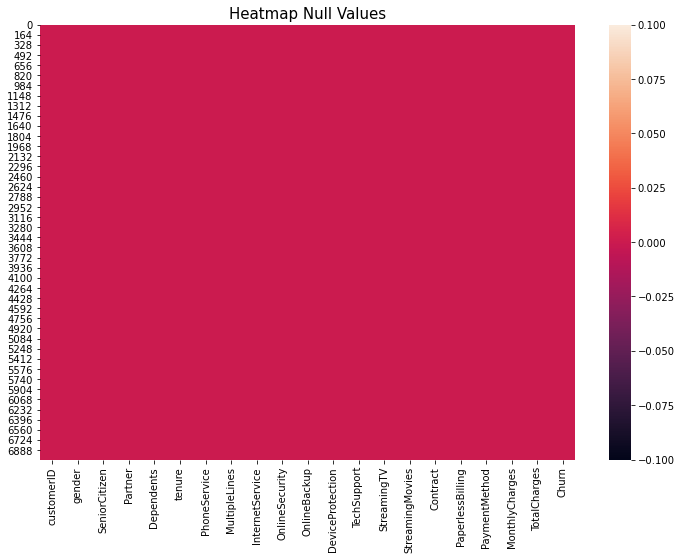

In [10]:
# checking the missing values using the heatmap
plt.figure(figsize=(12,8))
plt.title('Heatmap Null Values', fontsize=15)
sns.heatmap(df.isnull())

In [11]:
# it can be seen that there are no missing values.

In [12]:
df.duplicated().sum()

0

In [13]:
# There are duplicate values present in the dataset.

In [14]:
# checking the count for each type of value
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df.describe()
# This will not include the categorical variables.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.describe(include='all')
# by using all it can be assured that categorical feature are also included.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6615-ZGEDR,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [17]:
# Senior citizen doesn't have the median value.
# tenure median value is 29 and monthly charges median value is 70.35
# the minimum value of tenure is 0 and maximum value is 72.
# the minimum value of Monthly charges is 18.25 and maximum value is 118.75
# the outliers are present but not more.

### Univariate Analysis

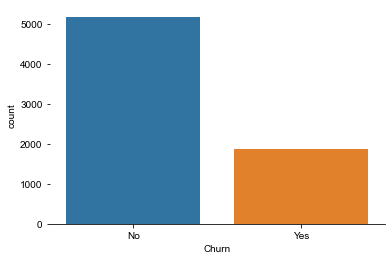

In [18]:
sns.countplot(df['Churn'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [19]:
# From above plot it can be seen that the count of no for churn is more than 5000.

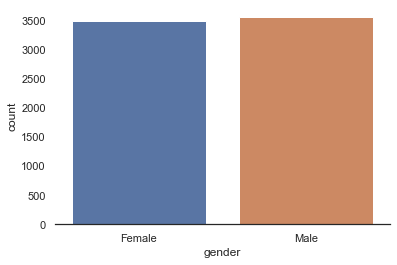

In [20]:
sns.countplot(df['gender'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [21]:
# The count for male and female is equal

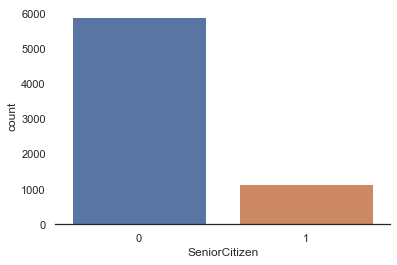

In [22]:
sns.countplot(df['SeniorCitizen'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [23]:
# the count for senior citizen is way more than the count of senior citizen.

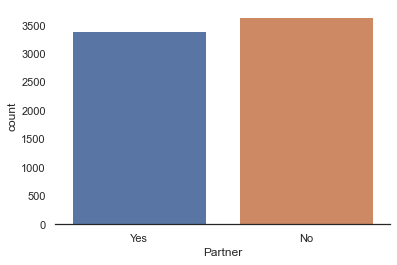

In [24]:
sns.countplot(df['Partner'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [25]:
# The count for partner for yes is less as compared to no.

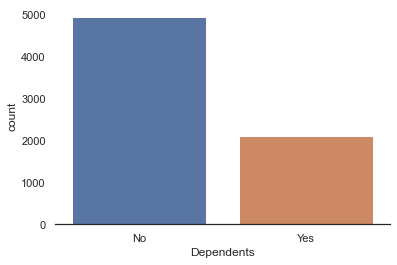

In [26]:
sns.countplot(df['Dependents'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [27]:
# the count for dependents for yes is less than no.

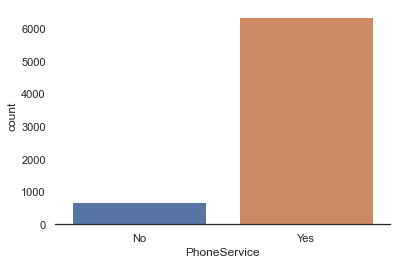

In [28]:
sns.countplot(df['PhoneService'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [29]:
# Most the customers have phone services with them.

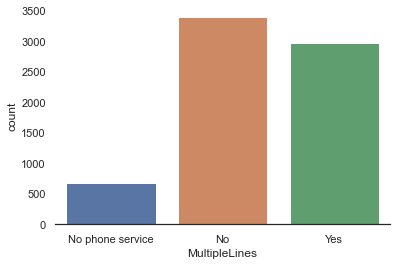

In [30]:
sns.countplot(df['MultipleLines'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [31]:
# The customer who are having multiple lines are more than 2800.

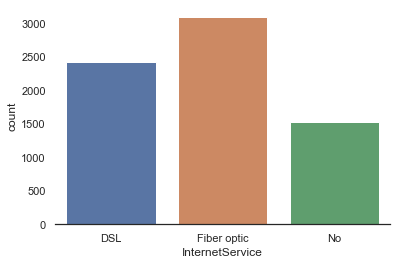

In [32]:
sns.countplot(df['InternetService'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [33]:
# More than 2300 customers have DSL service.
# aroud 1500 customer didn't hace the internet services with them.
# more than 3000 customer have fibre optic service with them.

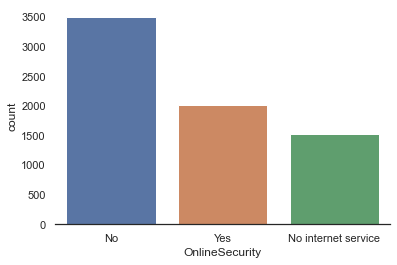

In [34]:
sns.countplot(df['OnlineSecurity'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [35]:
# the customer who didn't have online security are more than 3400.
# more than 1400 customrs have no internet service.
# more than 1900 customer opt for online security.

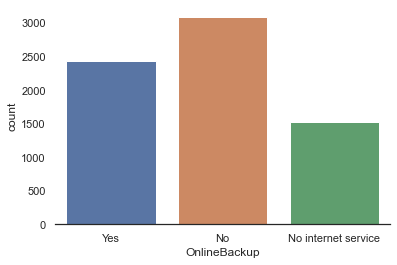

In [36]:
sns.countplot(df['OnlineBackup'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [37]:
# the customer who have online backup are more than 2400 and those who don't have online backup are more than 3000

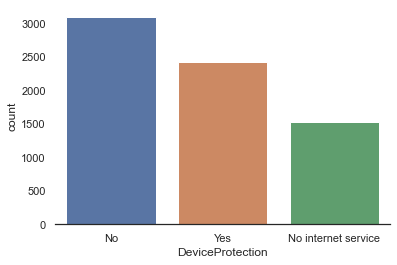

In [38]:
sns.countplot(df['DeviceProtection'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [39]:
# customers who don't have online protection are more than 3000 and those who have online protection are more than 2400

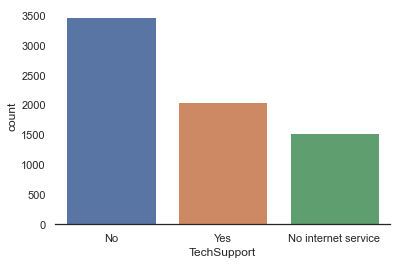

In [40]:
sns.countplot(df['TechSupport'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [41]:
# customer more than 3400 are those who don't have online protection, and more than 2000 customers have online protection.

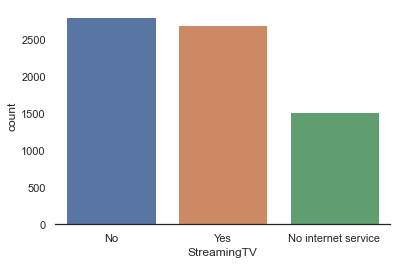

In [42]:
sns.countplot(df['StreamingTV'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [43]:
# more than 2500 customers have Streaming TV

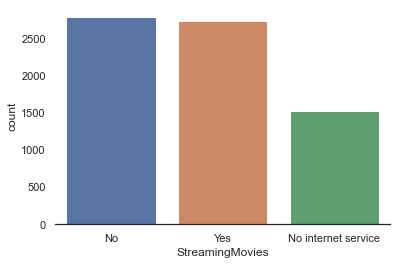

In [44]:
sns.countplot(df['StreamingMovies'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [45]:
# There are more than 2600 customers who stream movies 

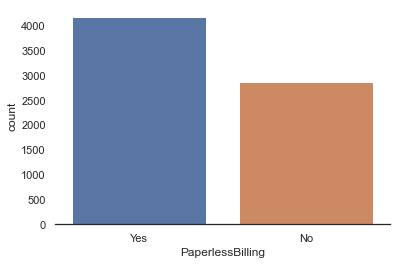

In [46]:
sns.countplot(df['PaperlessBilling'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [47]:
# more than 4000 customers get their bill paperless.

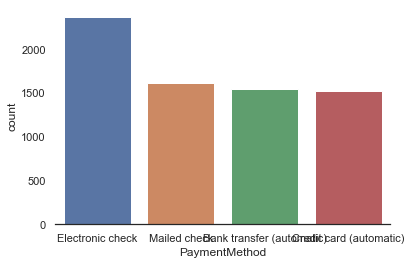

In [48]:
sns.countplot(df['PaymentMethod'])
sns.set(style="white",palette='deep',color_codes=True)
sns.despine(left=True)

In [49]:
# Customers who pay their bills via electronic check are more than 2400, and those who pay their bill via emial are more than 1500.

### Bivariate Analysis

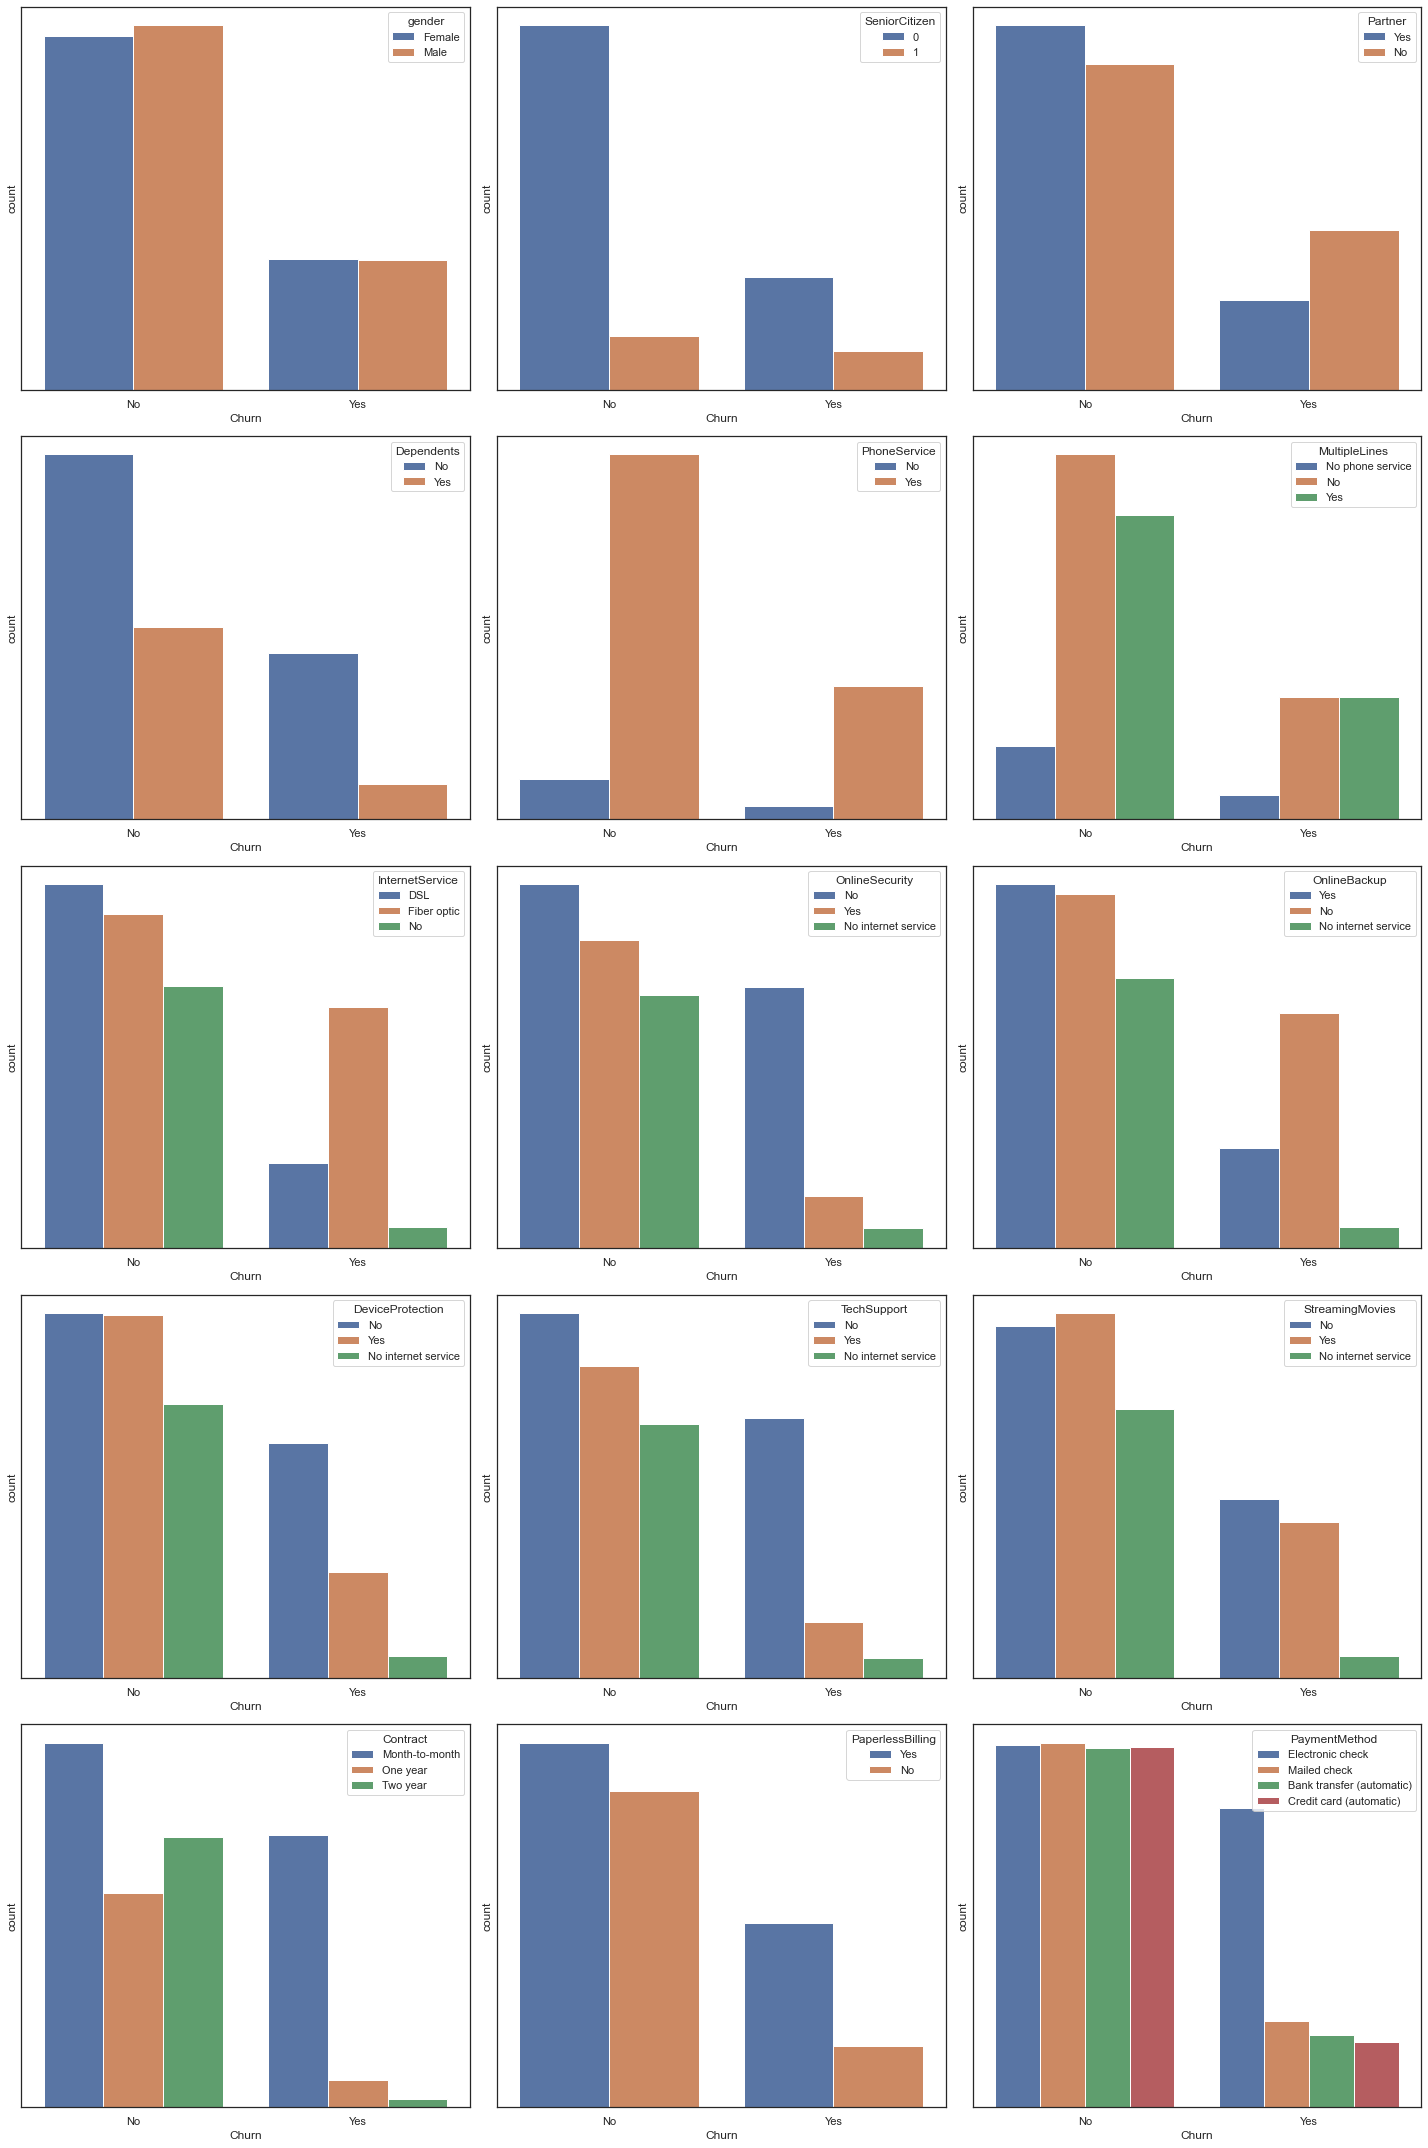

In [50]:
f, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

sns.countplot(df["Churn"],hue = df["gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["Contract"],ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],ax = axes[4,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

In [51]:
# Mojority of both female and male are there who had stopped doing transaction with the telecom service provider.
# Senior citizen who have the telecome are majority in number.

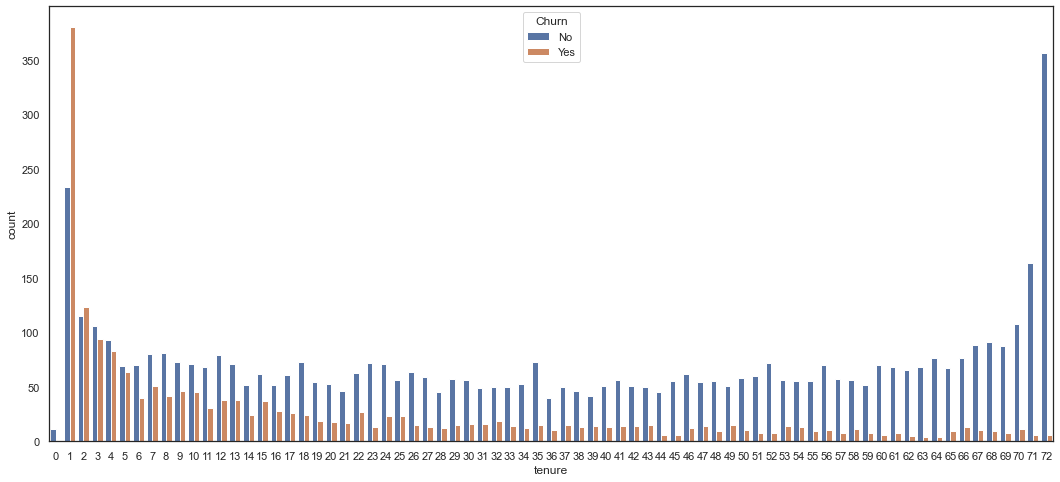

In [52]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"]);

### Multivariate Analysis

In [53]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

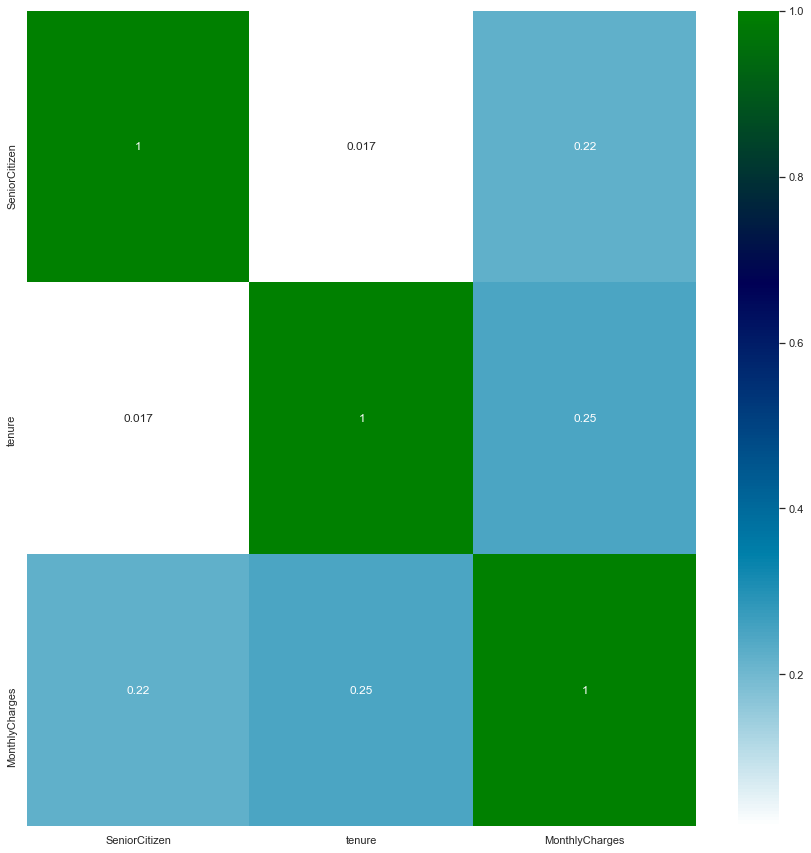

In [54]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap='ocean_r',annot=True,ax=ax)

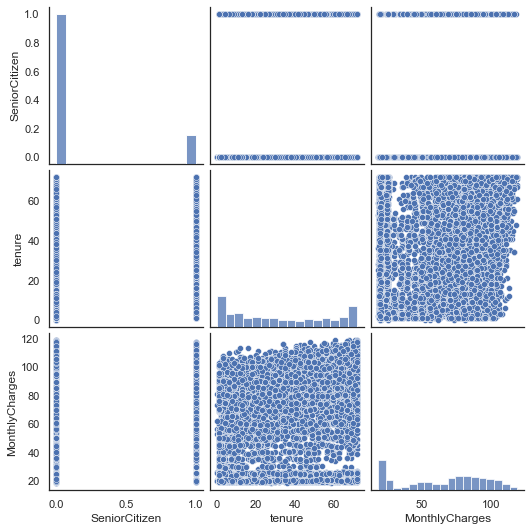

In [55]:
# pairplot() may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df);

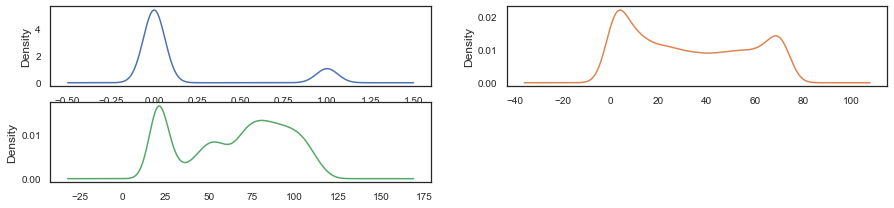

In [56]:
df.plot(kind='density',subplots=True,layout=(3,2),sharex=False, legend=False, fontsize=10,figsize=(15,5))
plt.show()

In [57]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

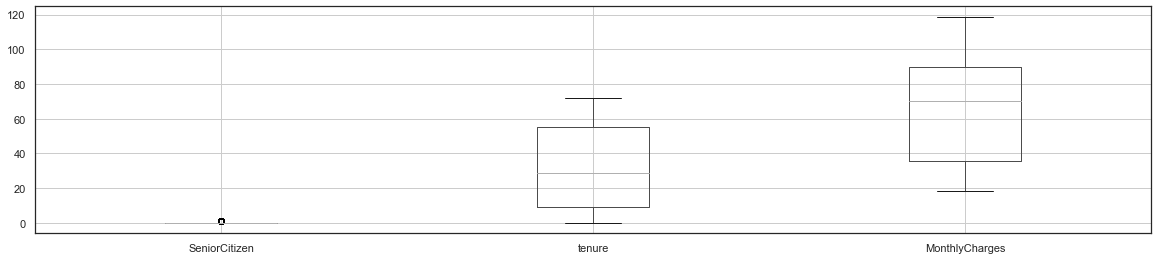

In [58]:
# Boxplot
df.boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [59]:
# The outliers are in acceptable limit.

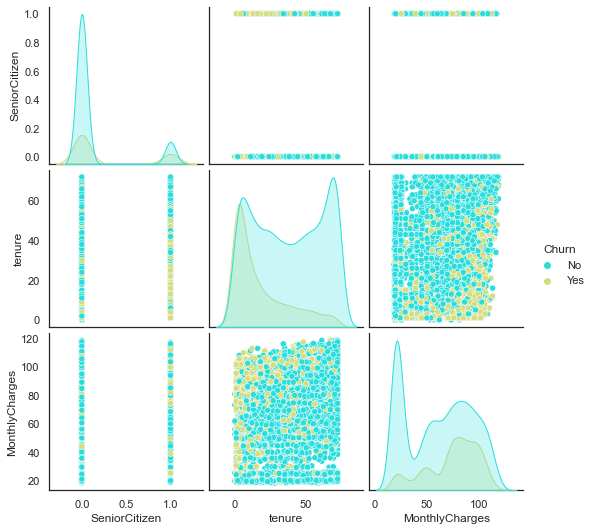

In [60]:
sns.pairplot(df,hue='Churn',palette='rainbow')

In [61]:
from sklearn.preprocessing import LabelEncoder

In [75]:
df1=df.apply(LabelEncoder().fit_transform)
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [76]:
# customer ID is not required to predict the churn of a customer
df1.drop(columns=['customerID'],axis=1,inplace=True)

In [78]:
# checking the correlation values
df1_corr=df1.corr().abs()

df1_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,0.010517,0.005106,0.006488,0.006739,0.000863,0.015017,0.012057,0.000549,0.006825,0.006421,0.008743,0.000126,0.011754,0.017352,0.014623,0.005291,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,0.211185,0.016567,0.008576,0.146185,0.032310,0.128221,0.013632,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.219524,0.037653,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.106501,0.059568,0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,0.159712,0.001762,0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.107507,0.009572,0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.268133,0.158523,0.352229
PhoneService,0.006488,0.008576,0.017706,0.001762,0.008448,1.000000,0.020538,0.387436,0.015198,0.024105,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.271209,0.083195,0.011942
MultipleLines,0.006739,0.146185,0.142410,0.024991,0.343032,0.020538,1.000000,0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.444580,0.114955,0.038037
InternetService,0.000863,0.032310,0.000891,0.044590,0.030359,0.387436,0.109216,1.000000,0.028416,0.036138,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.244965,0.055724,0.047291
OnlineSecurity,0.015017,0.128221,0.150828,0.152166,0.325468,0.015198,0.007141,0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.044692,0.042357,0.289309
OnlineBackup,0.012057,0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,0.013370,0.124847,0.141258,0.090756,0.195525


<AxesSubplot:>

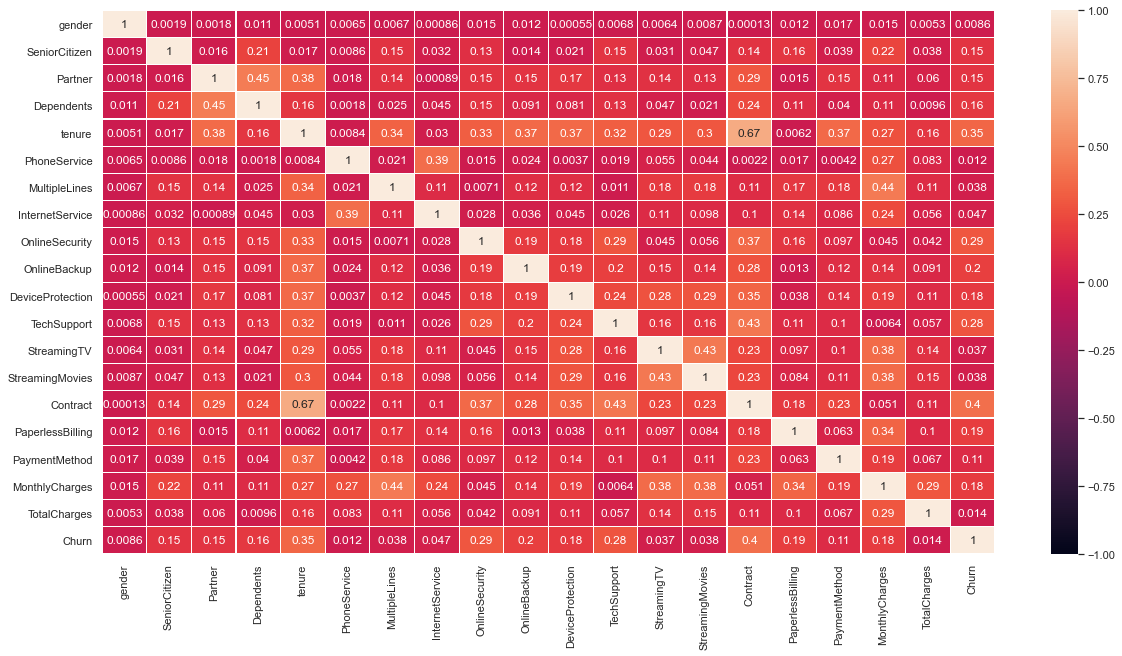

In [80]:
# ploting heat map
plt.figure(figsize=(20,10))
sns.heatmap(df1_corr,vmin=-1,vmax=+1,annot=True,linewidths=0.1,fmt='.2g')

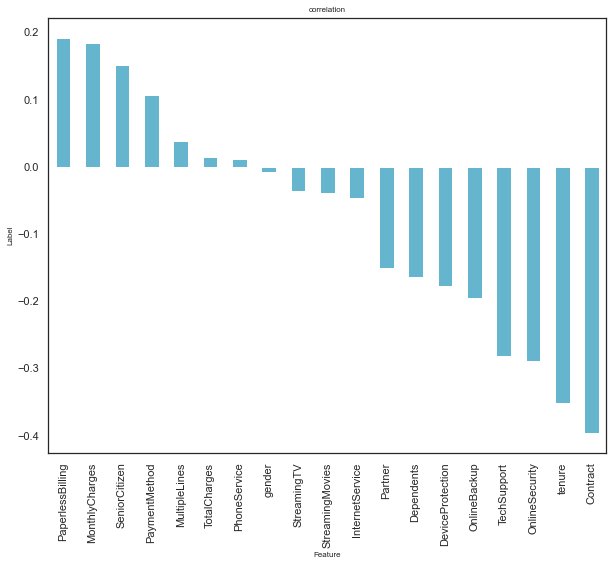

In [82]:
#Plotting the type of correlation with label and features
plt.figure(figsize=(10,8))
df1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=8)
plt.ylabel('Label',fontsize=8)
plt.title('correlation',fontsize=8)
plt.show()

## Spliting the data into train and test

In [88]:
X=df1.drop(columns=['Churn'],axis=1)

y=df1['Churn']

In [89]:
#Scailing the data using Standard scaler
#importing Standard scaler
from sklearn.preprocessing import StandardScaler
cols=['tenure', 'MonthlyCharges', 'TotalCharges']
for col in cols:     
    scaler = StandardScaler()     
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.131766,-0.398608
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.387740,-0.948762
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.517317,-1.641883
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.872611,-0.983710
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.095041,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.642612,-0.879397
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.372008,1.292099
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.142216,-0.139680
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.232979,-0.316534


In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

### Using Oversampling

<AxesSubplot:xlabel='Churn', ylabel='count'>

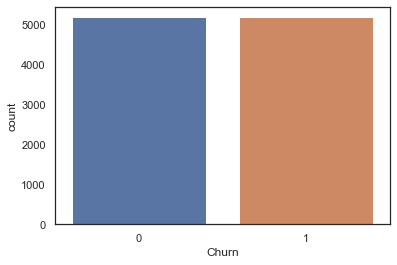

In [93]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_over,y_over=sm.fit_resample(X,y)
y_over.value_counts()
sns.countplot(y_over)

In [96]:
# Importing the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_val_score

### Logistic Regression

In [100]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

#predicting
y_pred_lr=lr.predict(X_test)

lr.score(X_train,y_train)

0.8029155622870124

In [101]:
#checking the score of our model
lr.score(X_test,y_test)

0.8080636002271436

In [102]:
#finding cross validation score
np.mean(cross_val_score(lr,X_over,y_over,cv=5))

0.7751286882738749

In [103]:
#Classification Report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1307
           1       0.65      0.56      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [104]:
#Confusion matrix
confusion_matrix(y_test,y_pred_lr)

array([[1169,  138],
       [ 200,  254]], dtype=int64)

### KNeighbors classifier

In [105]:
#instansiating
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
y_pred_knn=knn.predict(X_test)

In [107]:
knn.score(X_train,y_train)

0.8335857629685726

In [108]:
accuracy_score(y_test,y_pred_knn)

0.7705848949460534

In [109]:
np.mean(cross_val_score(knn,X_over,y_over,cv=5))

0.804312569025621

### Decision Tree classifier

In [110]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [111]:
y_pred_dt=dt.predict(X_test)

In [112]:
dt.score(X_train,y_train)

0.9979174555092768

In [113]:
dt.score(X_test,y_test)

0.7291311754684838

In [114]:
accuracy_score(y_test,y_pred_dt)

0.7291311754684838

In [115]:
#finding cross validation score
np.mean(cross_val_score(dt,X_over,y_over,cv=5))

0.7631493661901125

In [116]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1307
           1       0.48      0.52      0.50       454

    accuracy                           0.73      1761
   macro avg       0.65      0.66      0.66      1761
weighted avg       0.74      0.73      0.73      1761



In [117]:
confusion_matrix(y_test,y_pred_dt)

array([[1047,  260],
       [ 217,  237]], dtype=int64)

### Random Forest Classifier

In [118]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
y_pred_rf=rf.predict(X_test)

In [120]:
rf.score(X_train,y_train)

0.9977281332828474

In [121]:
rf.score(X_test,y_test)

0.8023850085178875

In [122]:
accuracy_score(y_test,y_pred_rf)

0.8023850085178875

In [123]:
np.mean(cross_val_score(rf,X_over,y_over,cv=5))

0.8435507363122048

In [124]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1307
           1       0.65      0.51      0.57       454

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [125]:
confusion_matrix(y_test,y_pred_rf)

array([[1180,  127],
       [ 221,  233]], dtype=int64)

### Support Vector Classifier

In [126]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [127]:
#Prediction
y_pred_svm=svm.predict(X_test)

In [128]:
#Training Score
svm.score(X_train,y_train)

0.8106777735706172

In [129]:
#Testing score
svm.score(X_test,y_test)

0.8069278818852924

In [130]:
#Accuracy_score
accuracy_score(y_test,y_pred_svm)

0.8069278818852924

In [131]:
#Cross validation score
np.mean(cross_val_score(svm,X_over,y_over,cv=5))

0.7927168717880466

In [132]:
#Classification Report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1307
           1       0.68      0.48      0.56       454

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.81      0.79      1761



In [133]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_svm)

array([[1205,  102],
       [ 238,  216]], dtype=int64)

### Roc Auc Scores

In [134]:
#Logistic Regression
lr=roc_auc_score(y_test,y_pred_lr)

In [135]:
### KNN
roc_auc_score(y_test,y_pred_knn)

0.6916316412135266

In [136]:
roc_auc_score(y_test,y_pred_dt)

0.6615487935177914

In [137]:
roc_auc_score(y_test,y_pred_rf)

0.7080233847564285

In [138]:
svm=roc_auc_score(y_test,y_pred_svm)

after completing the whole analysis it can be seen that Logistic Regression is best in terms of accuracy, cross validation score,roc auc score and also False positive cases while comparing to other models.

Logistic regression model is considered as the best model for predicting customer churn in telecom industry.

### Hyper Parameter Tuning

### Logistic Regression

In [174]:
parameters={ 'penalty':['11','12','elasticnet', 'none'],
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

In [175]:
GCV = GridSearchCV(lr, parameters, cv=5) 

In [176]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0,
                               10.0],
                         'penalty': ['11', '12', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [0.01, 0.001, 0.0001, 1e-05],
                         'warm_start': ['True', 'False']})

In [177]:
GCV.best_params_

{'C': 4.0,
 'penalty': 'none',
 'solver': 'saga',
 'tol': 0.01,
 'warm_start': 'False'}

In [178]:
lr=LogisticRegression(class_weight='dict',max_iter=100,multi_class='auto',penalty='l2')
lr.fit(X_train,y_train)
y_pred_logr=lr.predict(X_test)
print("Logistic Regression: \n\n",classification_report(y_test,y_pred_logr))
print("Test Accuracy:{}%".format(round(lr.score(X_test,y_test)*100,2)))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred_logr))

Logistic Regression: 

               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1307
           1       0.65      0.56      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

Test Accuracy:80.81%
Confusion Matrix: [[1169  138]
 [ 200  254]]


In [179]:
#Logistic Regression
auc=roc_auc_score(y_test,y_pred_logr)

In [180]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_logr)
fpr

array([0.        , 0.10558531, 1.        ])

In [181]:
tpr

array([0.        , 0.55947137, 1.        ])

In [182]:
thresholds

array([2, 1, 0])

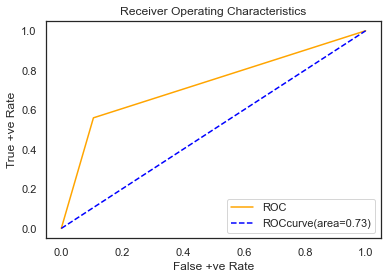

In [183]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCcurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()


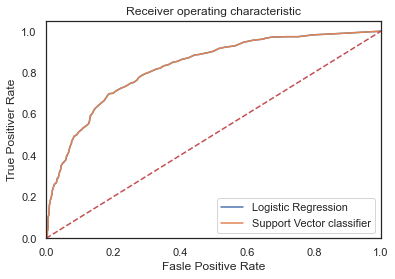

In [184]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
lr_roc_auc=roc_auc_score(y_test, lr.predict(X_test))
fpr,tpr,thersholds=roc_curve(y_test,lr.predict_proba(X_test)[:,1])
svm=SVC()
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
lr_roc_auc=roc_auc_score(y_test,lr.predict(X_test))
svm_roc_auc=roc_auc_score(y_test,svm.predict(X_test))
fpr,tpr,thersholds=roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression' %lr_roc_auc)
plt.plot(fpr,tpr,label='Support Vector classifier' %svm_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positiver Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC')
plt.show()

Here the false positive rate and true positive rate starts from zero and touches 1.

In [187]:
Final_lr = LogisticRegression()
Final_lr.fit(X_train,y_train)
pred_lr = Final_lr.predict(X_test)
acc=accuracy_score(y_test,pred_lr)
print(acc*100)

80.80636002271436


Both support vector classifier and Logistic regression giving almost the same accuracy but the roc auc score is little less in SVM 
logistic regression will be the selected.

### The accuracy for our model is 81%

In [186]:
# From above analysis it can be analyzed that whether the customers are churned or not they are still using the company services.

## Saving the model

In [188]:
import joblib
joblib.dump(Final_lr,'Customer_churn.pkl')      #dump is used to serialize the model


# we give pkl file to client

['Customer_churn.pkl']